#Machine_Learning_Project1(Predicting_Wine_Quality )

* Purpose:
To build various regression & classification models to predict whether a particular red wine is “good quality” or not by considering the accuracy we obtain from each model.

* The quality of a wine is determined by 11 input variables:
-Fixed acidity,
-Volatile acidity,
-Citric acid,
-Residual sugar,
-Chlorides,
-Free sulfur dioxide,
-Total sulfur dioxide,
-Density,
-pH,
-Sulfates,
-Alcohol.


#Importing Libraries:

In [1]:
#numpy will be used for making the mathematical calculations more accurate.
import numpy as np
#pandas will be used to work with file formats like csv, xls etc.
import pandas as pd
#matplotlib will be used to help with data analyzing.
import matplotlib as plt

#Reading data:

In [2]:
dataset = pd.read_csv('/content/winequality-red.csv')

In [3]:
#See the dataset
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# See the first five rows of the dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# See the last five rows of the dataset
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#See some parameters
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#checking for null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


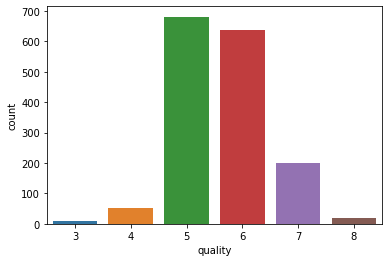

In [8]:
import seaborn as sns
sns.countplot(x='quality', data=dataset)

#Preprocessing data for performing algorithms:

In [9]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

##Encoding Textual information
* Label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lab_quality = LabelEncoder()

In [12]:
dataset['quality']= lab_quality.fit_transform(dataset['quality'])

In [13]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

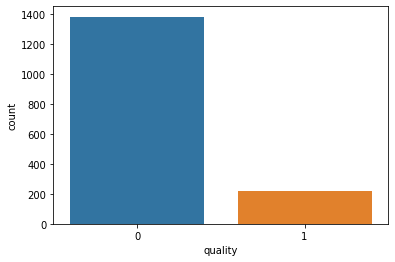

In [14]:
sns.countplot(dataset['quality'])

* The attribute *quality* will become our '**label**' and the rest of the attributes will become the '**features**'.

In [15]:
#separating the features and labels into two different dataframes.
x = dataset.drop('quality', axis=1).values
y = dataset.iloc[:,-1].values

In [16]:
#The exact values of wine quality. 0 stands for bad wine, whereas 1 is for good wine.
dataset.quality.value_counts().sort_index()

0    1382
1     217
Name: quality, dtype: int64

In [17]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0])

#Split into Test and Train data:

In [19]:
#using train_test_split() function imported from sklearn model.
from sklearn.model_selection import train_test_split

In [20]:
#test_size=0.2 to make the test data 20% of the original data.
#The rest 80% is used for training.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)


In [21]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1279
320
1279
320


#Scaling_data:


###Normalising Data

In [22]:
#using MinMaxScaler() function
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [23]:
sc.fit(dataset)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
sc=sc.transform(dataset)

In [25]:
sc.round(2)

array([[0.25, 0.4 , 0.  , ..., 0.14, 0.15, 0.  ],
       [0.28, 0.52, 0.  , ..., 0.21, 0.22, 0.  ],
       [0.28, 0.44, 0.04, ..., 0.19, 0.22, 0.  ],
       ...,
       [0.15, 0.27, 0.13, ..., 0.25, 0.4 , 0.  ],
       [0.12, 0.36, 0.12, ..., 0.23, 0.28, 0.  ],
       [0.12, 0.13, 0.47, ..., 0.2 , 0.4 , 0.  ]])

###Standardising Data

*Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

In [26]:
#using StandardScaler() function
from sklearn.preprocessing import StandardScaler

In [27]:
t_train = y_train.reshape(len(y_train),1)
t_test = y_test.reshape(len(y_test),1)

In [28]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [29]:
x_std_train = x_sc.fit_transform(x_train)
y_std_train = y_sc.fit_transform(t_train)

In [30]:
x_std_test = x_sc.transform(x_test)
y_std_test = y_sc.transform(t_test)

In [31]:
x_test[:10,5:]

array([[ 10.     ,  52.     ,   0.9968 ,   3.23   ,   0.77   ,   9.5    ],
       [  9.     ,  30.     ,   0.9968 ,   3.41   ,   0.53   ,   9.5    ],
       [ 13.     ,  27.     ,   0.99516,   3.26   ,   0.84   ,  11.7    ],
       [  9.     ,  46.     ,   0.9962 ,   3.41   ,   0.54   ,   9.4    ],
       [ 15.     ,  34.     ,   0.99655,   3.49   ,   0.68   ,  10.5    ],
       [ 23.     ,  48.     ,   0.9981 ,   3.41   ,   0.74   ,   9.2    ],
       [ 24.     , 125.     ,   0.9984 ,   3.31   ,   0.61   ,   9.4    ],
       [ 15.     ,  23.     ,   0.99627,   3.54   ,   0.6    ,  11.     ],
       [ 40.5    , 165.     ,   0.9912 ,   3.25   ,   0.59   ,  11.9    ],
       [ 18.     ,  30.     ,   0.99712,   3.4    ,   0.75   ,   9.8    ]])

#Applying different Algorithms:

##Comparing in Regression Models




* Linear Regression
* Polynomial Regression
* Decision tree Regression
* Random Forest Regression
* Support Vector Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [33]:
m_reg = LinearRegression()
p_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
r_reg = RandomForestRegressor(n_estimators=250)
s_reg = SVR()

In [34]:
x_poly = PolynomialFeatures(degree = 3)
x_poly = x_poly.fit_transform(x_train)

In [35]:
#Executing fit function on all
m_reg.fit(x_train,y_train)
p_reg.fit(x_poly,y_train) 
d_reg.fit(x_train,y_train) 
r_reg.fit(x_train,y_train)
s_reg.fit(x_std_train,y_std_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
#Using Predict Function
temp = PolynomialFeatures(degree = 3)
temp=temp.fit_transform(x_test)

In [37]:
m_pred = m_reg.predict(x_test)
p_pred = p_reg.predict(temp)
d_pred = d_reg.predict(x_test)
r_pred = r_reg.predict(x_test)
s_pred = s_reg.predict(x_std_test)

In [38]:
#using the r2_score() function.
from sklearn.metrics import r2_score

In [39]:
m = r2_score(y_test,m_pred)
p = r2_score(y_test,p_pred)
d = r2_score(y_test,d_pred)
r = r2_score(y_test,r_pred)
s = r2_score(y_std_test,s_pred)

In [40]:
print('Linear Regression: ' + str(m) + '\nPolynomial Linear Regression: ' + str(p) +
      '\nDecision Tree Regression: ' + str(d) + '\nRandom Forest Regression: ' + str(r) + 
      '\nSupport Vector Regression : ' + str(s))

Linear Regression: 0.16627439166684532
Polynomial Linear Regression: -1.226943219059395
Decision Tree Regression: 0.02857142857142858
Random Forest Regression: 0.41800411428571427
Support Vector Regression : 0.19133287738603388


Looking at *regression* results,
* The highest accuracy percentage we obtained by applying *Random Forest regression*.
* Also we obtain the negative value accuracy.
* Thus Random Forest give us good prediction accuracy for this dataset among other Regression algorithms.

##Comparing in Classification Models

* Logistic Regression
* KNN
* Decision Tree
* Random Forest 
* Linear SVC
* Kernel SVC

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [42]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier()
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel= 'rbf')

In [43]:
#Executing fit function on all
l_cla.fit(x_train, y_train)
k_cla.fit(x_train, y_train)
d_cla.fit(x_train, y_train)
r_cla.fit(x_train, y_train)
s_cla.fit(x_train, y_train)
ks_cla.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#Using Predict Function
l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

In [45]:
#Using confusion_matrix Function
from sklearn.metrics import confusion_matrix

In [46]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [47]:
print(l_c)


[[266  14]
 [ 29  11]]


In [48]:
print(k_c)

[[258  22]
 [ 28  12]]


In [49]:
print(d_c)

[[261  19]
 [ 15  25]]


In [50]:
print(r_c)

[[273   7]
 [ 18  22]]


In [51]:
print(s_c)

[[280   0]
 [ 40   0]]


In [52]:
print(ks_c)

[[280   0]
 [ 40   0]]


In [53]:
#Using accuracy_score Function.
from sklearn.metrics import accuracy_score

In [54]:
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [55]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) +
      '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(ks_a))

Logistic Regression: 0.865625
KNN: 0.84375
Decision Tree: 0.89375
Random Forest: 0.921875
Linear SVC: 0.875
Kernel SVC: 0.875


After applying all the algorithms in *Classification* we conclude that:
* The Random Forest Classifier Model achieved highest accuracy.

Hence,compared different Machine Learning Algorithms using Regression & Classification models .
 Random Forest outlined other algorithms in making good predictions.

*Thank You*

Kharat Pooja c